CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Loading dataset
data = pd.read_csv("C:/Users/ASUS/OneDrive - Manipal Education (MENA) FZ LLC/Desktop/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#First 5 rows of dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Info on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Distibution of Legit/Fraud Transactions 
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Highly Unbalanced Dataset

284315 legit transactions.
492 fraudulent transactions.

0--> Legit
1--> Fraudulent

In [7]:
#Separating data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
#Statistical measures of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#Compare the values of both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


UNDERSAMPLING: 
Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions. The sample dataset will be used for training and testing the model.

In [12]:
legit_sample = legit.sample(n=492)

In [13]:
#Concatenate 2 dataframes
new_data=pd.concat([legit_sample,fraud], axis=0)

In [14]:
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
248185,153827.0,-0.852512,0.066691,0.682272,-0.729272,-0.602809,0.125969,0.366105,0.523928,-0.315958,...,0.409897,0.737266,0.202047,-0.346363,0.027567,0.656491,-0.216833,-0.113876,180.00,0
102170,68077.0,-2.695933,-1.192400,1.479152,0.794292,0.243150,-1.044561,-0.474306,0.403698,0.363044,...,0.011480,0.825660,1.340331,0.442414,0.232193,0.490193,-0.033896,0.059598,14.90,0
41633,40766.0,-2.094123,1.572556,1.621239,1.501071,-0.668063,2.255432,-2.168066,-5.050966,0.385204,...,-2.851280,0.597871,0.431728,-0.027733,-0.655331,-0.613604,-0.934927,-0.558193,21.62,0
133097,80246.0,1.117309,0.050167,0.813666,1.480090,-0.624137,-0.263828,-0.214348,0.129270,0.626680,...,-0.236638,-0.552943,0.129319,0.349567,0.323383,-0.515292,0.045450,0.025519,9.95,0
35410,38108.0,0.561003,0.312749,0.341816,1.318890,0.143377,0.105831,0.269972,-0.061028,0.437263,...,0.012446,0.383117,0.292498,-0.018956,-0.801403,-0.498962,-0.401301,-0.386155,7.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [16]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92813.150407,0.083002,-0.017849,0.045228,-0.091884,-0.015102,-0.091575,0.064453,0.021624,-0.069929,...,0.018791,-0.015620,-0.023239,0.012968,-0.012036,0.018859,-0.010498,0.015692,0.002148,84.744004
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


SPLITTING DATA INTO FEATURES AND TARGETS

In [17]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [18]:
X


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
248185,153827.0,-0.852512,0.066691,0.682272,-0.729272,-0.602809,0.125969,0.366105,0.523928,-0.315958,...,0.266396,0.409897,0.737266,0.202047,-0.346363,0.027567,0.656491,-0.216833,-0.113876,180.00
102170,68077.0,-2.695933,-1.192400,1.479152,0.794292,0.243150,-1.044561,-0.474306,0.403698,0.363044,...,-0.730149,0.011480,0.825660,1.340331,0.442414,0.232193,0.490193,-0.033896,0.059598,14.90
41633,40766.0,-2.094123,1.572556,1.621239,1.501071,-0.668063,2.255432,-2.168066,-5.050966,0.385204,...,1.133168,-2.851280,0.597871,0.431728,-0.027733,-0.655331,-0.613604,-0.934927,-0.558193,21.62
133097,80246.0,1.117309,0.050167,0.813666,1.480090,-0.624137,-0.263828,-0.214348,0.129270,0.626680,...,-0.284593,-0.236638,-0.552943,0.129319,0.349567,0.323383,-0.515292,0.045450,0.025519,9.95
35410,38108.0,0.561003,0.312749,0.341816,1.318890,0.143377,0.105831,0.269972,-0.061028,0.437263,...,-0.264846,0.012446,0.383117,0.292498,-0.018956,-0.801403,-0.498962,-0.401301,-0.386155,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [19]:
Y

248185    0
102170    0
41633     0
133097    0
35410     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

SPLIT DATA INTO TRAINING AND TESTING DATA

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


TRAIN MODEL- Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

MODEL EVALUATION - ACCURACY SCORE

In [29]:
#Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.9491740787801779


ACCURACY(Training Data) ACHIEVED= 94.92%



In [31]:
#Testing Data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on testing data : ", testing_data_accuracy)

Accuracy on testing data :  0.9238578680203046


ACCURACY (Test data) ACHIEVED = 92.39%

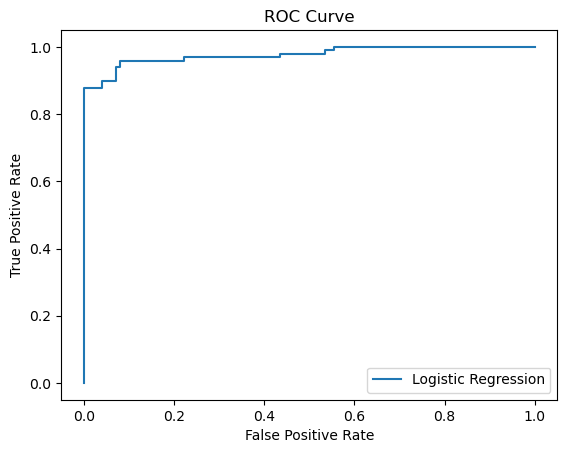

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
